In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fact/1022.txt   
  inflating: dataset/fact/1023.txt   
  inflating: dataset/fact/1024.txt   
  inflating: dataset/fact/1025.txt   
  inflating: dataset/fact/1026.txt   
  inflating: dataset/fact/1027.txt   
  inflating: dataset/fact/1028.txt   
  inflating: dataset/fact/1029.txt   
  inflating: dataset/fact/103.txt    
  inflating: dataset/fact/1030.txt   
  inflating: dataset/fact/1031.txt   
  inflating: dataset/fact/1032.txt   
  inflating: dataset/fact/1033.txt   
  inflating: dataset/fact/1034.txt   
  inflating: dataset/fact/1035.txt   
  inflating: dataset/fact/1036.txt   
  inflating: dataset/fact/1037.txt   
  inflating: dataset/fact/1038.txt   
  inflating: dataset/fact/1039.txt   
  inflating: dataset/fact/104.txt    
  inflating: dataset/fact/1040.txt   
  inflating: dataset/fact/1041.txt   
  inflating: dataset/fact/1042.txt   
  inflating: dataset/fact/1043.txt   
  inflating: dataset/fact/1044.txt   

In [ ]:
import csv
import glob
import pandas as pd
import os

In [ ]:
dirpath = "./dataset"
outputpath = 'datasetcsv.csv'
columns_name =["news","label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
for folder in folders_name:
  files = os.listdir(dirpath + '/' + folder)
  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file,'label': folder}
      csvout.writerow(row)
output.close()

In [ ]:
!pip install hazm

In [ ]:
import hazm
import re

In [ ]:
normalizer = hazm.Normalizer()
stopwords = hazm.stopwords_list
tokenizer = hazm.word_tokenize

def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)
    # removing wierd patterns
    tokens = tokenizer(text)
    filtered = list(set(tokens) - set(stopwords()))
    # Define a pattern to match punctuation characters (including Arabic and Persian punctuation)
    punctuation_pattern = list('،.؛؟!"#$%&\'()*+/:;<=>?@[\\]^_`{|}~')
    # Remove punctuation from the tokens
    filtered = list(set(filtered) - set(punctuation_pattern))
    # Join the filtered tokens back into a single string
    text = ' '.join(filtered)
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text



In [ ]:
df = pd.read_csv('datasetcsv.csv')
df.dropna(inplace=True)

In [ ]:
df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

,news,label
0,بالای غیرضروری تعویق جراحی بیمار انگلیس افتاده...,fact
1,Carnosic التهاب دست » نتایج پیشتر کرده_بودند م...,fact
2,اختلال شناختی می‌ماند ۱۹ ماه چندین باقی بازمان...,fact
3,جفت حمله ویروس جنین کرونا,fact
4,آلرژی متوتروکسات دریافت » میلی‌گرم « خاصی قطع ...,fact
...,...,...
5021,ایرانی توسط ژاپن تبلیغ داروی,fake
5022,واکسن درمان نیازی قطعی کرونا معلوم,fake
5023,گلی دمنوش گیاه ویروس پریلا کرونا ببرد استفاده ...,fake
5024,واکسن انگلیس کلا بدن همش متوقف‌شده اینو علکیه,fake


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.3 MB/s eta 0:00:00


In [ ]:
!pip install -q sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00


In [ ]:
from transformers import BertConfig, BertTokenizer
from transformers import TFBertModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features
from transformers import AutoConfig, AutoTokenizer
from transformers import TFAutoModelForMaskedLM

import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFXLMRobertaForSequenceClassification



labels = list(sorted(df['label'].unique()))
df['label_id'] = df['label'].apply(lambda t: labels.index(t))
# Split the dataset into train, validation, and test sets
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])

# Load the xlm-roberta tokenizer and model
MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = TFXLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base")

# Tokenize and prepare data for training
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16

def tokenize_text(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=MAX_LEN)

x_train = tokenize_text(train['news'].tolist())
x_valid = tokenize_text(valid['news'].tolist())
x_test = tokenize_text(test['news'].tolist())

y_train = train['label_id'].values
y_valid = valid['label_id'].values
y_test = test['label_id'].values

x_train = {key: np.array(val) for key, val in x_train.items()}
x_valid = {key: np.array(val) for key, val in x_valid.items()}
x_test = {key: np.array(val) for key, val in x_test.items()}

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(TRAIN_BATCH_SIZE)
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(VALID_BATCH_SIZE)

# Compile and train the model
EPOCHS = 2
LEARNING_RATE = 2e-5

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

history = model.fit(train_dataset, validation_data=valid_dataset, epochs=EPOCHS)

# Evaluate the model on the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(VALID_BATCH_SIZE)
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

All PyTorch model weights were used when initializing TFXLMRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFXLMRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
227/227 [==============================] - 196s 588ms/step - loss: 0.4182 - accuracy: 0.8126 - val_loss: 0.3228 - val_accuracy: 0.8781
Epoch 2/2
63/63 [==============================] - 9s 149ms/step - loss: 0.2845 - accuracy: 0.8876
Test Loss: 0.2845
Test Accuracy: 0.8876


In [ ]:
model.summary()

Model: "tfxlm_roberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFXLMRobertaMainLa  multiple                 277453056 
 yer)                                                            
                                                                 
 classifier (TFXLMRobertaCla  multiple                 592130    
 ssificationHead)                                                
                                                                 
Total params: 278,045,186
Trainable params: 278,045,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
save_path = '/content/gdrive/MyDrive/xlm-roberta-Model'

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
predictions = model.predict(x_test)
ypred = predictions[0].argmax(axis=-1).tolist()

print()
print(classification_report(y_test, ypred, target_names=labels))
print()

print(f'F1: {f1_score(y_test, ypred, average="weighted")}')

32/32 [==============================] - 18s 264ms/step

              precision    recall  f1-score   support

        fact       0.93      0.84      0.88       502
        fake       0.85      0.93      0.89       503

    accuracy                           0.89      1005
   macro avg       0.89      0.89      0.89      1005
weighted avg       0.89      0.89      0.89      1005


F1: 0.8873104728540194


<Axes: >

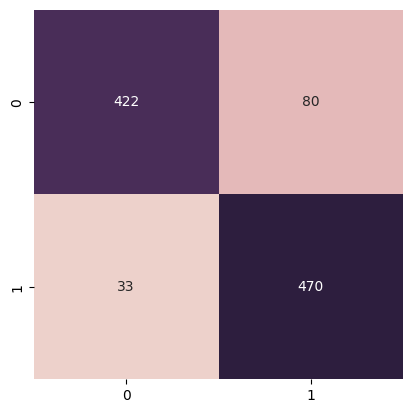

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(y_test, ypred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
model.save_pretrained(save_path)

In [ ]:
from transformers import TFBertForSequenceClassification

In [ ]:
loaded_model = TFBertForSequenceClassification.from_pretrained(save_path)

You are using a model of type xlm-roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at /content/gdrive/MyDrive/xlm-roberta-Model were not used when initializing TFBertForSequenceClassification: ['roberta', 'classifier/dense/bias:0', 'classifier/out_proj/kernel:0', 'classifier/out_proj/bias:0', 'classifier/dense/kernel:0']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized f

In [ ]:
test_string = 'اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی'

In [ ]:
test_string

'میزان بالای ابتلای مسئولان ایرانی به کرونا'

In [ ]:
df1 = pd.DataFrame(columns=['text', 'label'])
df1.loc[0] = [test_string, "fact"]
df1

,text,label
0,اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی,fact


In [ ]:
id_label_map = {
    'fact': 0,
    'fake': 1
}
df1['label'] = df1['label'].map(id_label_map)
df1

,text,label
0,اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی,0


In [ ]:
def tokenize_text(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=MAX_LEN)

In [ ]:
MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16

In [ ]:
x_test1 = tokenize_text(df1['text'].tolist())
y_test1 = df1['label'].values
x_test1 = {key: np.array(val) for key, val in x_test1.items()}
test_dataset1 = tf.data.Dataset.from_tensor_slices((x_test1, y_test1)).batch(VALID_BATCH_SIZE)

In [ ]:
optimizer1 = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss1 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loaded_model.compile(optimizer1, loss1)

In [ ]:
ev = loaded_model.evaluate(test_dataset1)
print()
print(f'Evaluation: {ev}')
print()

predictions = loaded_model.predict(x_test1)
ypred1 = predictions[0].argmax(axis=-1).tolist()
print(ypred1)

1/1 [==============================] - 0s 344ms/step - loss: 0.6906

Evaluation: 0.6905826926231384

1/1 [==============================] - 0s 351ms/step
[0]
